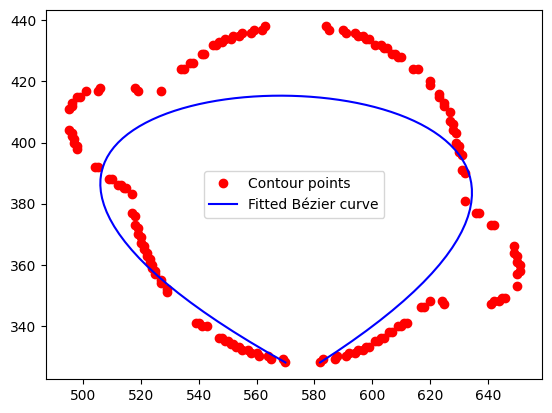

In [ ]:
import cv2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Preprocessing the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(thresholded, 50, 150)
    return edges

# Extracting the contours
def extract_contours(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)  # Get the largest contour
    contour = contour.reshape(-1, 2)  # Reshape for easier handling
    return contour

# Bézier curve function
def bezier_curve(t, p0, p1, p2, p3):
    return (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * p1 + 3 * (1 - t) * t**2 * p2 + t**3 * p3

# Fitting the Bézier curve
def fit_bezier(contour):
    t = np.linspace(0, 1, len(contour))  # Parameter t
    x, y = contour[:, 0], contour[:, 1]  # Contour coordinates

    # Initial guess for the control points
    p0 = contour[0]
    p3 = contour[-1]
    p1 = (2/3 * p0 + 1/3 * p3)
    p2 = (1/3 * p0 + 2/3 * p3)

    popt_x, _ = curve_fit(lambda t, p1, p2: bezier_curve(t, p0[0], p1, p2, p3[0]), t, x, p0=[p1[0], p2[0]])
    popt_y, _ = curve_fit(lambda t, p1, p2: bezier_curve(t, p0[1], p1, p2, p3[1]), t, y, p0=[p1[1], p2[1]])

    return p0, [popt_x[0], popt_y[0]], [popt_x[1], popt_y[1]], p3

# Plotting the results
def plot_results(contour, bezier_points):
    t = np.linspace(0, 1, 100)
    bezier_x = bezier_curve(t, bezier_points[0][0], bezier_points[1][0], bezier_points[2][0], bezier_points[3][0])
    bezier_y = bezier_curve(t, bezier_points[0][1], bezier_points[1][1], bezier_points[2][1], bezier_points[3][1])

    plt.plot(contour[:, 0], contour[:, 1], 'ro', label='Contour points')
    plt.plot(bezier_x, bezier_y, 'b-', label='Fitted Bézier curve')
    plt.legend()
    plt.show()

# Main function
def main(image_path):
    edges = preprocess_image(image_path)
    contour = extract_contours(edges)
    bezier_points = fit_bezier(contour)
    plot_results(contour, bezier_points)

# Run the main function
image_path = '/content/Art.jpeg'
main(image_path)


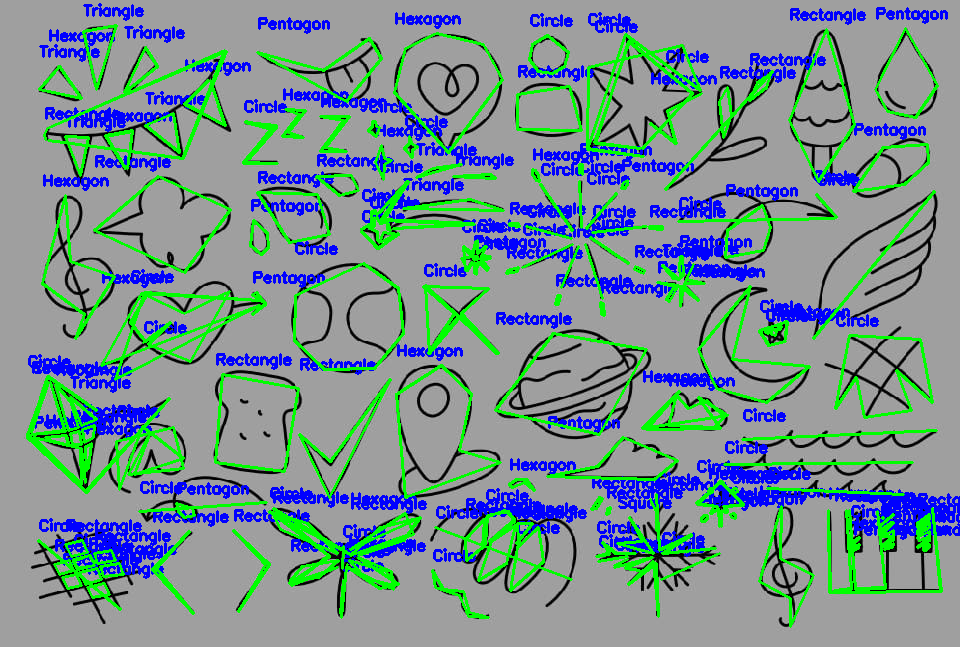

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Function to detect shapes
def detect_shapes(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(approx)

        # Determine the shape
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            aspect_ratio = w / float(h)
            if 0.95 <= aspect_ratio <= 1.05:
                shape = "Square"
            else:
                shape = "Rectangle"
        elif len(approx) == 5:
            shape = "Pentagon"
        elif len(approx) == 6:
            shape = "Hexagon"
        else:
            shape = "Circle"

        # Draw the contour and label the shape
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the output image
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"
    detect_shapes(image_path)


Triangle: 11
Square: 3
Rectangle: 44
Pentagon: 19
Hexagon: 32
Circle: 64


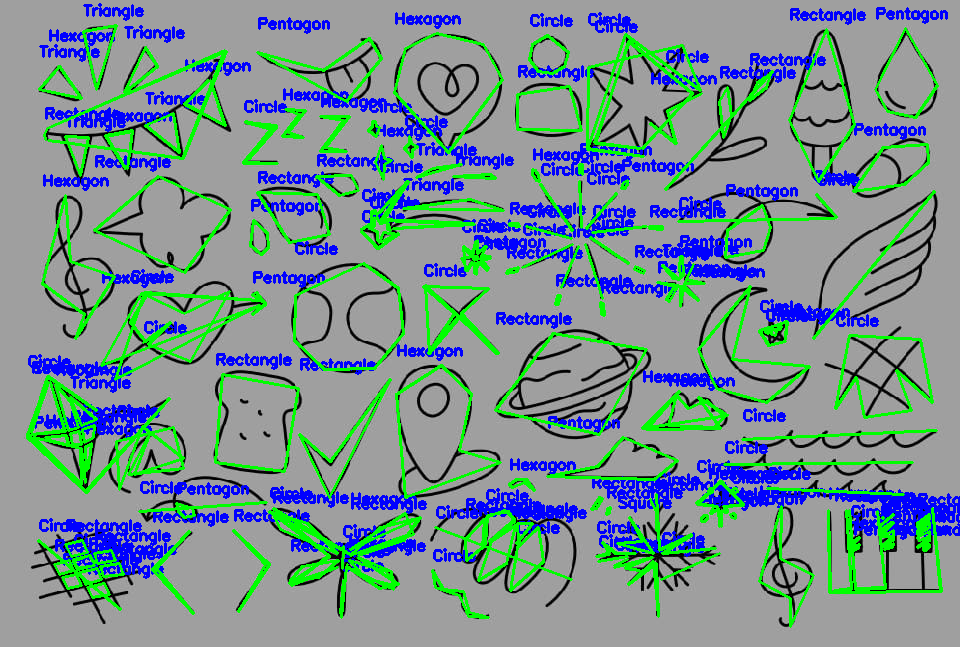

In [ ]:
import cv2
import numpy as np

# Function to detect shapes and count them
def detect_shapes(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dictionary to count shapes
    shape_counts = {
        "Triangle": 0,
        "Square": 0,
        "Rectangle": 0,
        "Pentagon": 0,
        "Hexagon": 0,
        "Circle": 0
    }

    # Loop over the contours
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(approx)

        # Determine the shape
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            aspect_ratio = w / float(h)
            if 0.95 <= aspect_ratio <= 1.05:
                shape = "Square"
            else:
                shape = "Rectangle"
        elif len(approx) == 5:
            shape = "Pentagon"
        elif len(approx) == 6:
            shape = "Hexagon"
        else:
            shape = "Circle"

        # Update the shape count
        shape_counts[shape] += 1

        # Draw the contour and label the shape
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the counts of each shape
    for shape, count in shape_counts.items():
        print(f"{shape}: {count}")

    # Display the output image
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/image1.jpeg"  # Replace with your image path
    detect_shapes(image_path)


In [ ]:
import cv2
import numpy as np

# Function to detect shapes and count them
def detect_shapes(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dictionary to count shapes
    shape_counts = {
        "Triangle": 0,
        "Square": 0,
        "Rectangle": 0,
        "Pentagon": 0,
        "Hexagon": 0,
        "Circle": 0
    }

    # Loop over the contours
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(approx)

        # Determine the shape
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            aspect_ratio = w / float(h)
            if 0.95 <= aspect_ratio <= 1.05:
                shape = "Square"
            else:
                shape = "Rectangle"
        elif len(approx) == 5:
            shape = "Pentagon"
        elif len(approx) == 6:
            shape = "Hexagon"
        else:
            shape = "Circle"

        # Update the shape count
        shape_counts[shape] += 1

        # Draw the contour and label the shape
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the counts of each shape
    for shape, count in shape_counts.items():
        print(f"{shape}: {count}")

    # Display the output image
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/image1.jpeg"  # Replace with your image path
    detect_shapes(image_path)


**1.Straight lines.**

Number of straight lines detected: 4


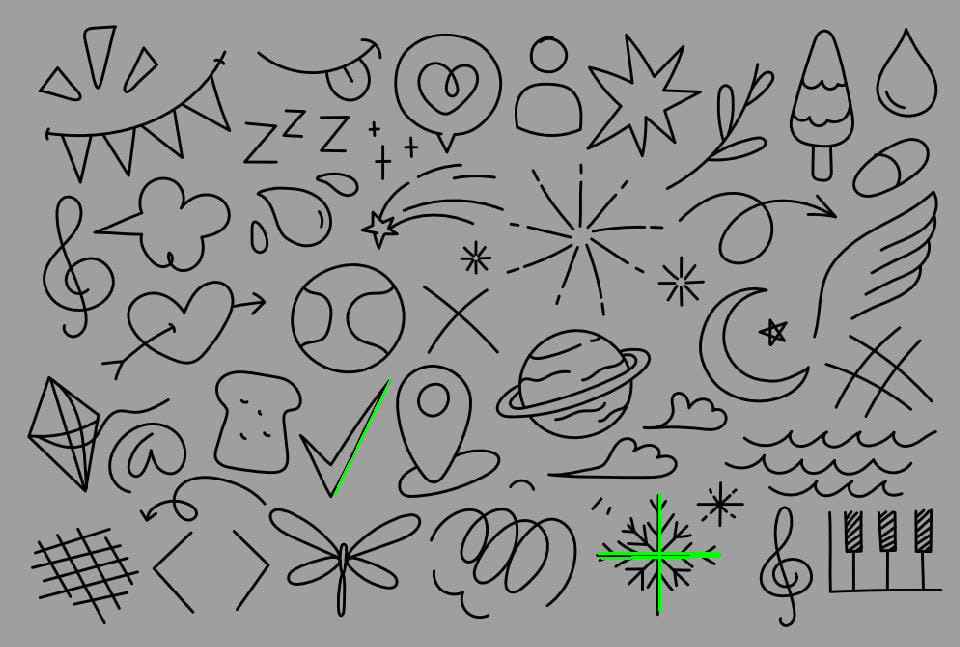

In [ ]:
import cv2
import numpy as np

# Function to detect and count straight lines
def detect_and_count_straight_lines(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edged, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    # Initialize the line count
    line_count = 0

    # Draw the detected lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            line_count += 1

    # Print the count of detected lines
    print(f"Number of straight lines detected: {line_count}")

    # Display the output image
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    detect_and_count_straight_lines(image_path)


**2. Circles and Ellipses**

 
 
 
 
 
 
 
 
 
 
 
Triangle: 0
Square: 0
Rectangle: 0
Pentagon: 0
Hexagon: 0
Circle: 173


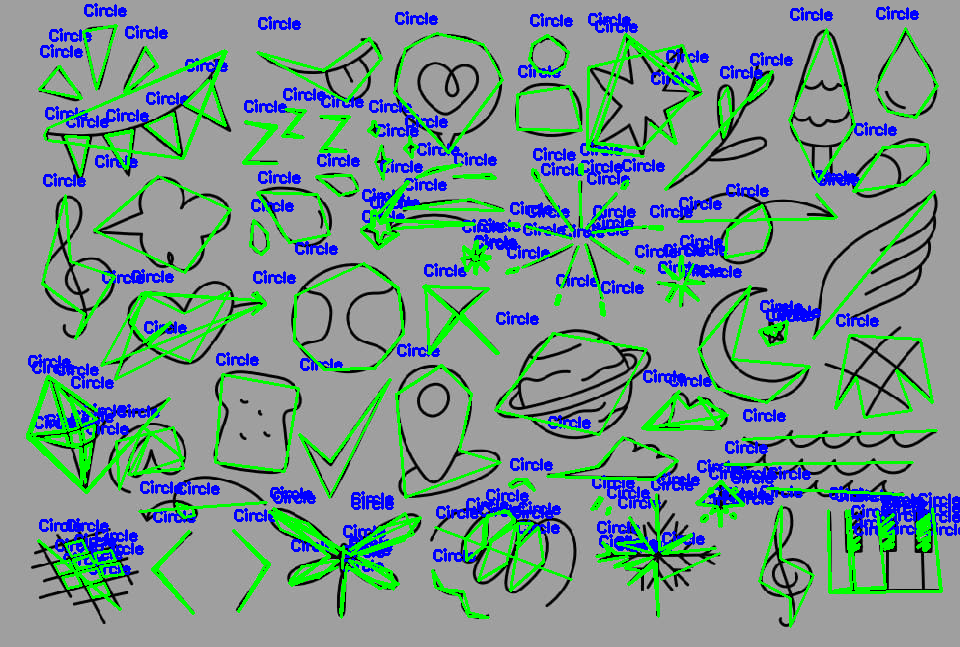

In [ ]:
import cv2
import numpy as np

# Function to detect shapes and count them
def detect_shapes(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dictionary to count shapes
    shape_counts = {
        "Triangle": 0,
        "Square": 0,
        "Rectangle": 0,
        "Pentagon": 0,
        "Hexagon": 0,
        "Circle": 0
    }

    # Loop over the contours
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(approx)

        # Determine the shape
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            aspect_ratio = w / float(h)
            if 0.95 <= aspect_ratio <= 1.05:
                shape = "Square"
            else:
                shape = "Rectangle"
        elif len(approx) == 5:
            shape = "Pentagon"
        elif len(approx) == 6:
            shape = "Hexagon"
        else:
            shape = "Circle"

        # Update the shape count
        shape_counts[shape] += 1

        # Draw the contour and label the shape
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
        cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the counts of each shape
    for shape, count in shape_counts.items():
        print(f"{shape}: {count}")

    # Display the output image
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    detect_shapes(image_path)


**Symmetric Curves**

Number of symmetric curves detected: 24


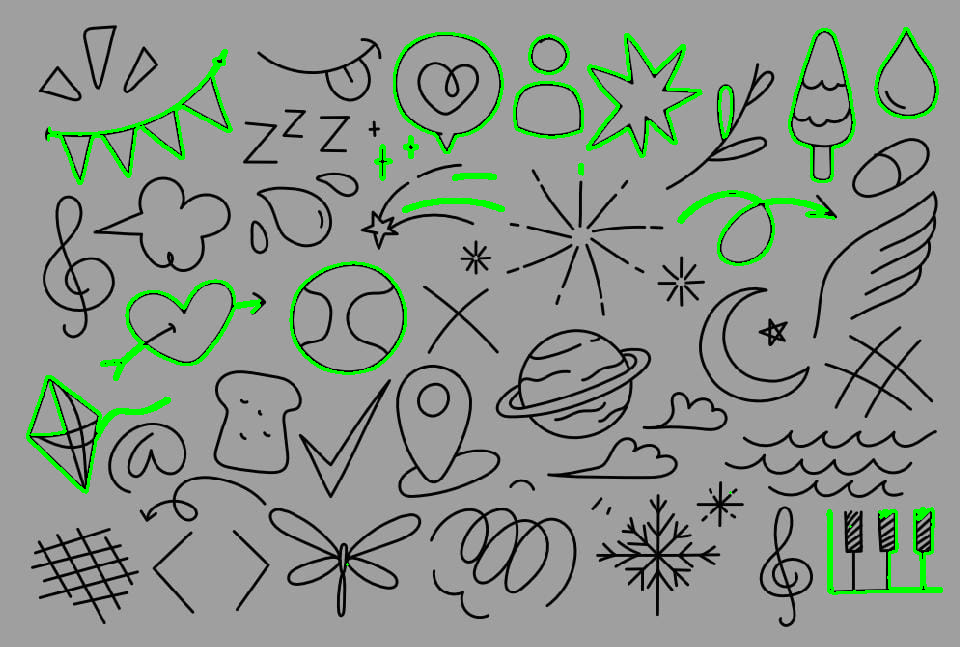

In [ ]:
import cv2
import numpy as np

# Function to identify and count symmetric curves
def detect_symmetric_curves(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize symmetric curve count
    symmetric_curve_count = 0

    # Loop over each contour
    for contour in contours:
        # Create a mask from the contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], -1, 255, -1)

        # Get the bounding box and extract the ROI
        x, y, w, h = cv2.boundingRect(contour)
        roi = mask[y:y+h, x:x+w]

        # Flip the ROI horizontally and vertically
        roi_flipped_horizontally = cv2.flip(roi, 1)
        roi_flipped_vertically = cv2.flip(roi, 0)

        # Compare original ROI with its flipped versions
        horizontal_symmetry = np.sum(roi == roi_flipped_horizontally) / roi.size
        vertical_symmetry = np.sum(roi == roi_flipped_vertically) / roi.size

        # Consider a contour symmetric if it is sufficiently similar to its flipped version
        if horizontal_symmetry > 0.9 or vertical_symmetry > 0.9:
            symmetric_curve_count += 1
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

    # Print the number of symmetric curves detected
    print(f"Number of symmetric curves detected: {symmetric_curve_count}")

    # Display the output image
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    detect_symmetric_curves(image_path)


**Completing Incomplete Curves**

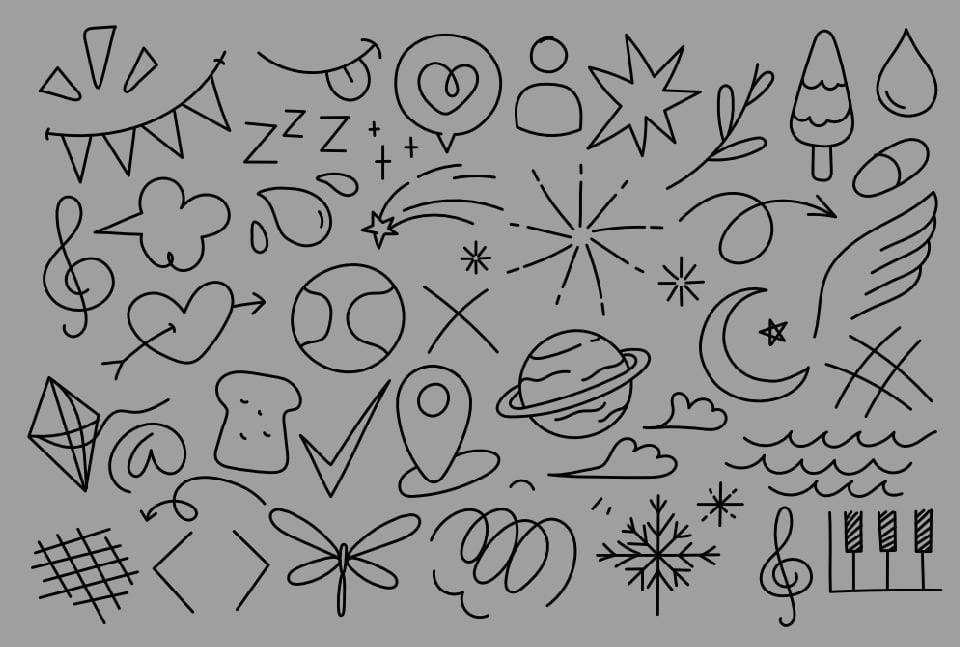

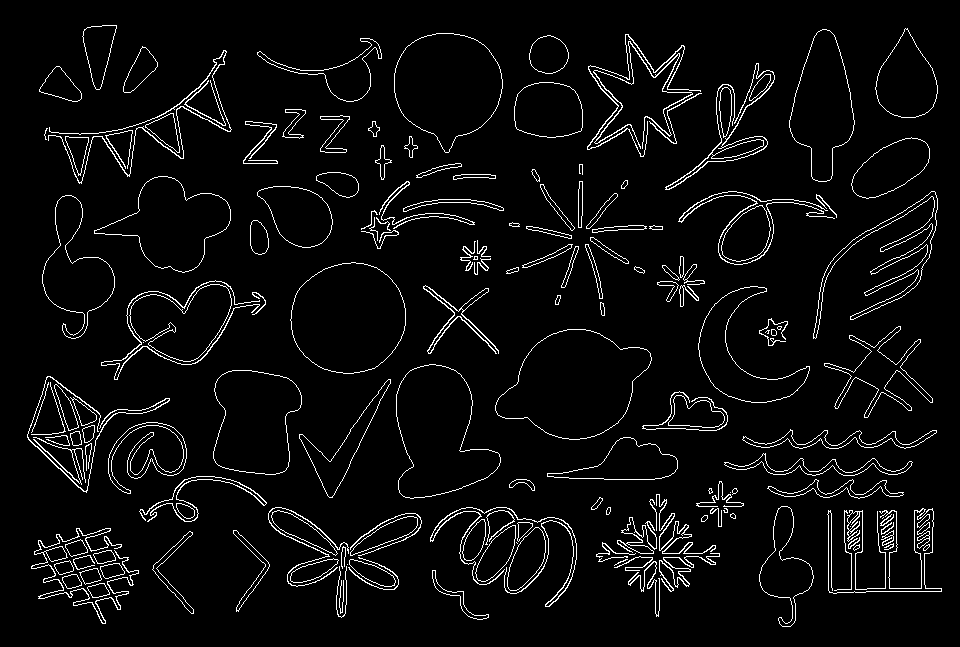

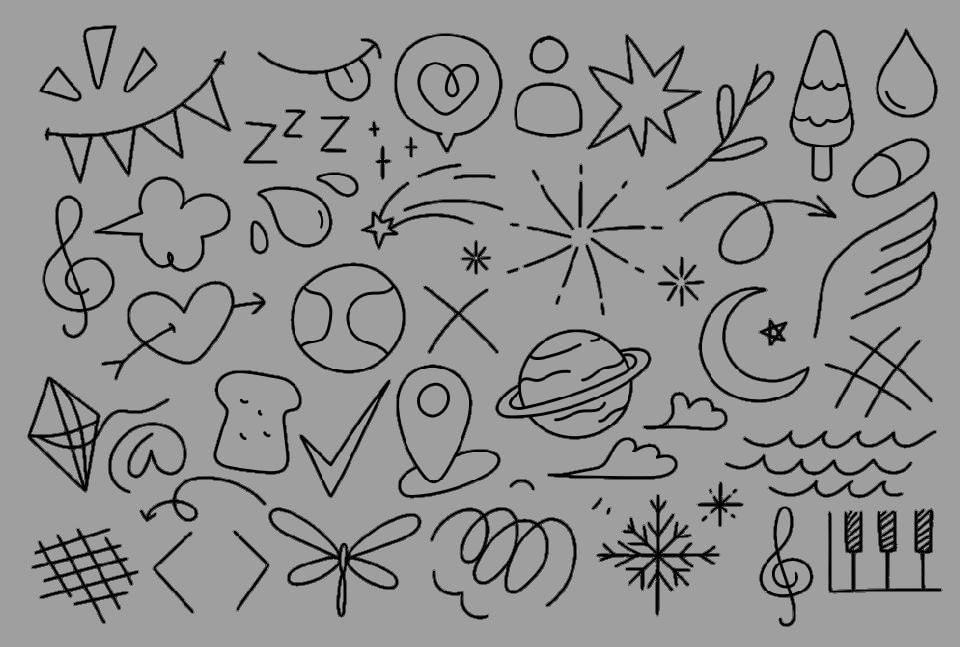

In [ ]:
import cv2
import numpy as np

# Function to complete incomplete curves
def complete_curves(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for inpainting
    mask = np.zeros_like(gray)

    # Draw the detected contours on the mask
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, 255, 1)

    # Inpainting to complete the curves
    completed_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Display the results
    cv2_imshow( image)
    cv2_imshow( mask)
    cv2_imshow(completed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    complete_curves(image_path)


**Completing Incomplete Curves**

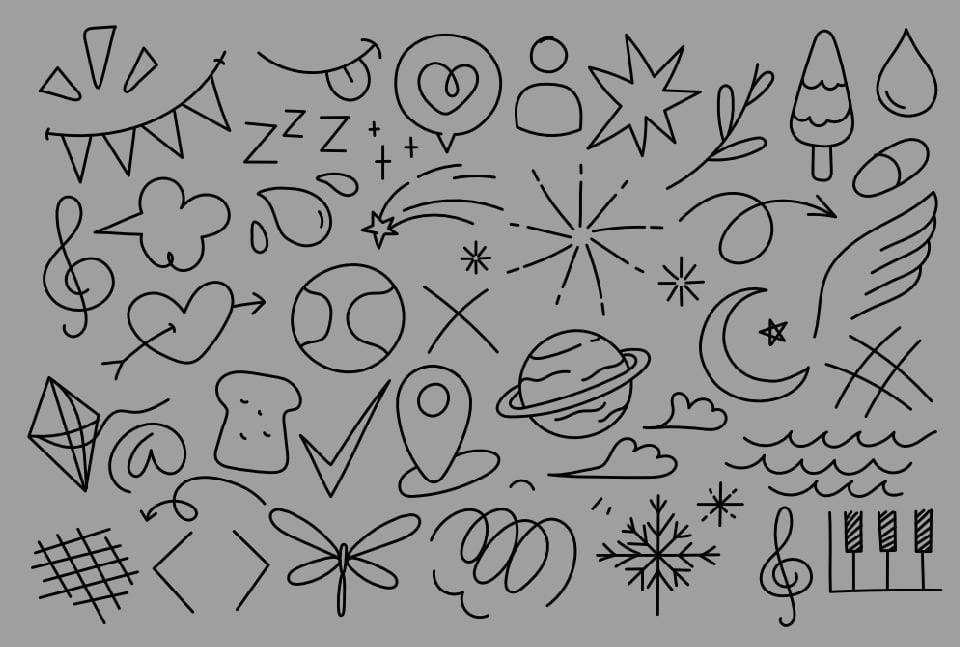

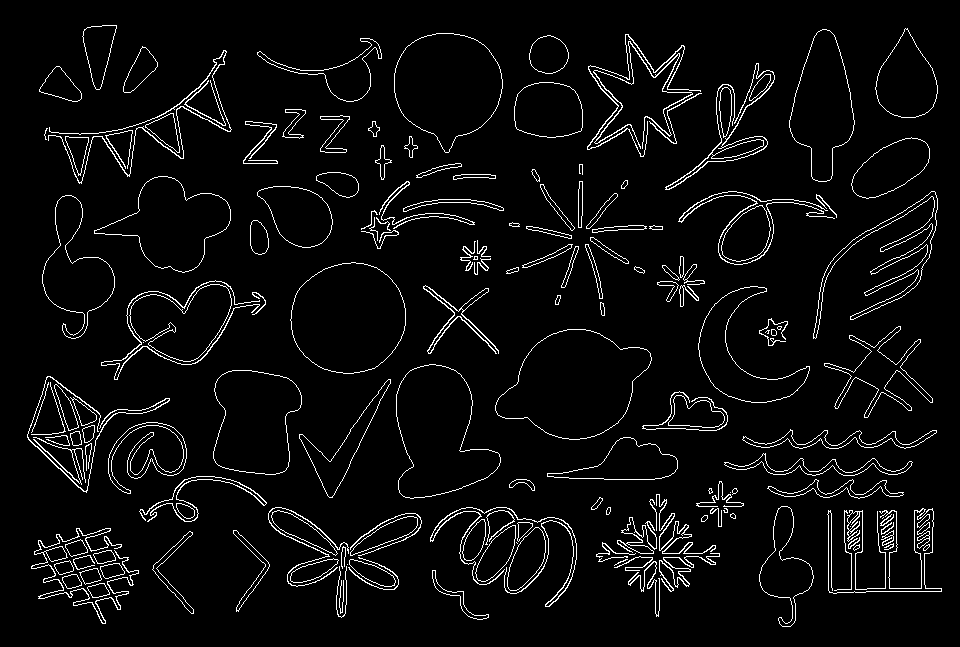

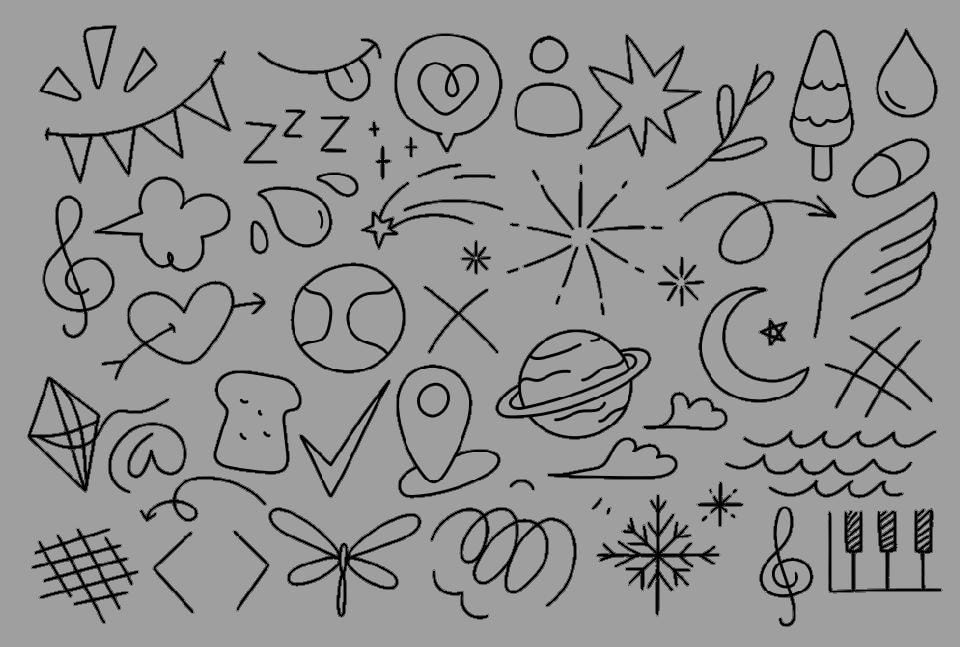

In [ ]:
import cv2
import numpy as np

def complete_incomplete_curves(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for inpainting
    mask = np.zeros_like(gray)

    # Draw the detected contours on the mask
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, 255, 1)

    # Inpainting to complete the curves
    completed_image = cv2.inpaint(image, mask, inpaintRadius=10, flags=cv2.INPAINT_TELEA)

    # Display the results
    cv2_imshow( image)
    cv2_imshow( mask)
    cv2_imshow( completed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    complete_incomplete_curves(image_path)


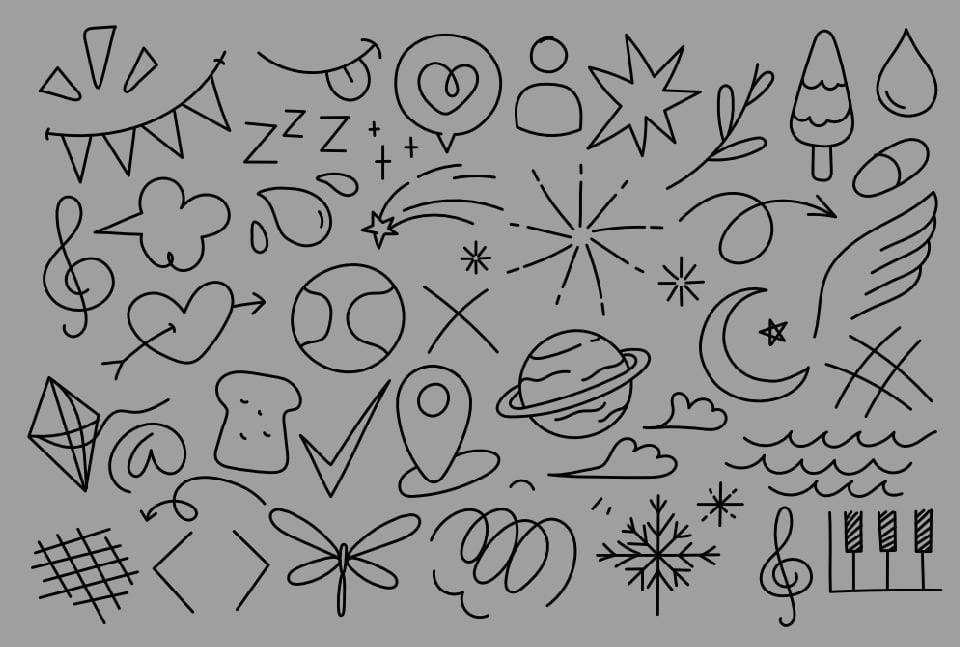

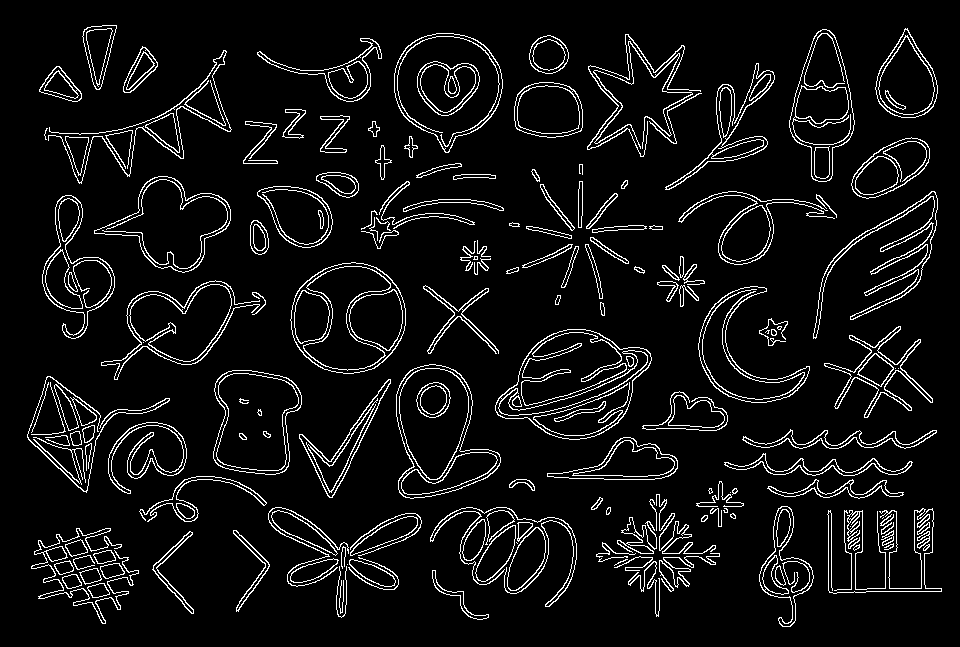

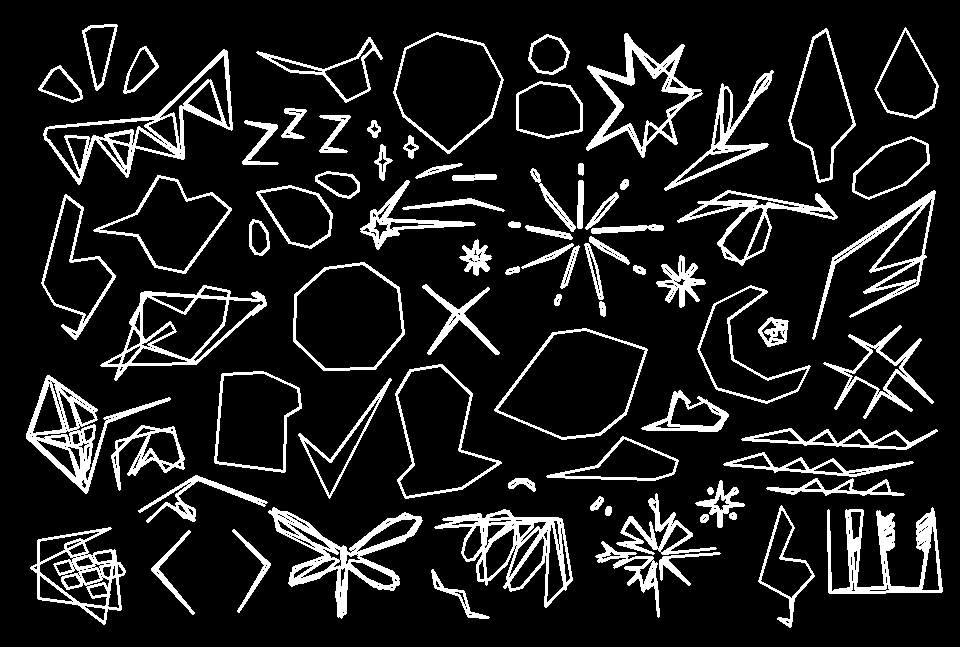

In [ ]:
import cv2
import numpy as np

def regularize_curves(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image for drawing the regularized curves
    regularized_image = np.zeros_like(image)

    # Process each contour to regularize the curves
    for contour in contours:
        # Approximate the contour to a polygon to reduce the number of points
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx_curve = cv2.approxPolyDP(contour, epsilon, True)

        # Create a mask for smoothing the curve
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [approx_curve], -1, 255, thickness=cv2.FILLED)

        # Smooth the curve using morphological operations
        kernel = np.ones((5, 5), np.uint8)
        smoothed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        smoothed_curve = cv2.bitwise_and(image, image, mask=smoothed_mask)

        # Draw the regularized curve on the output image
        cv2.drawContours(regularized_image, [approx_curve], -1, (255, 255, 255), 2)

    # Display the results
    cv2_imshow(image)
    cv2_imshow(edges)
    cv2_imshow(regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    regularize_curves(image_path)


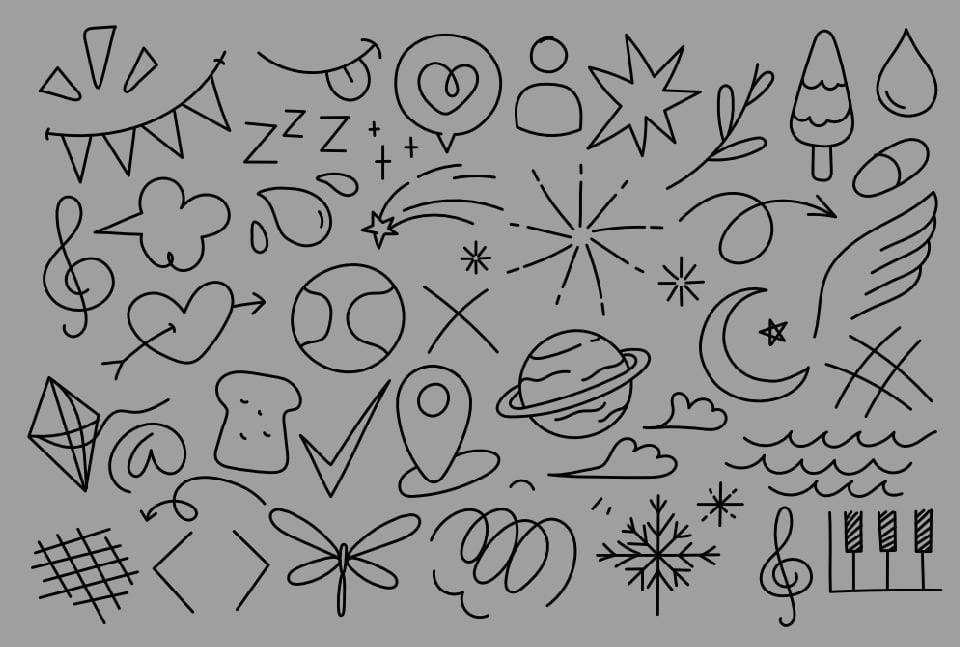

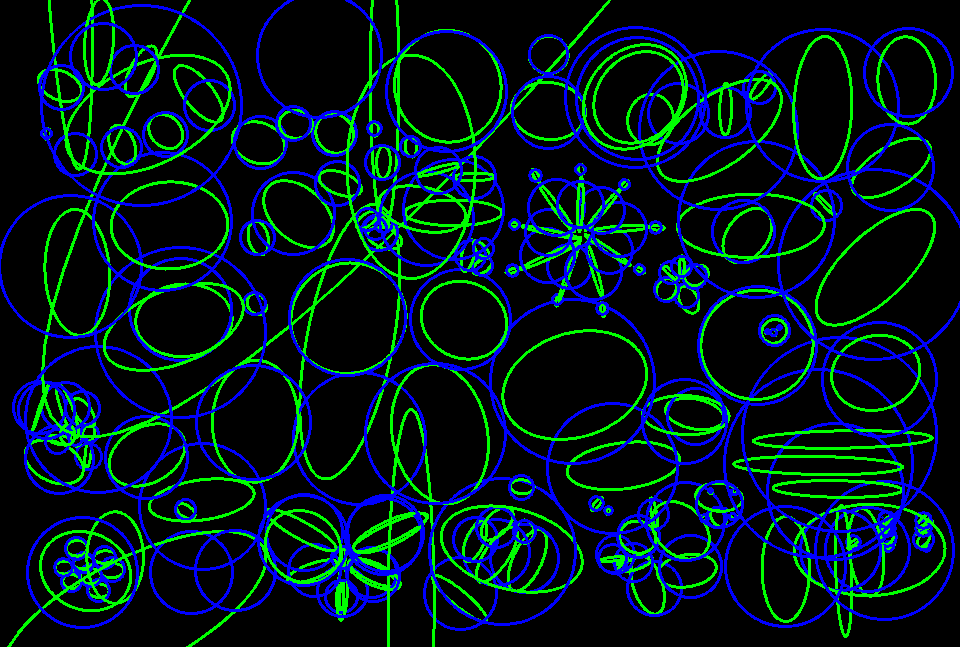

In [ ]:
import cv2
import numpy as np

def fit_regular_shapes(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image for drawing the regular shapes
    regular_shape_image = np.zeros_like(image)

    # Process each contour to fit and draw regular shapes
    for contour in contours:
        # Fit an ellipse to the contour if it has enough points
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            center, axes, angle = ellipse
            cv2.ellipse(regular_shape_image, ellipse, (0, 255, 0), 2)

        # Fit a circle to the contour by finding the minimum enclosing circle
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(regular_shape_image, center, radius, (255, 0, 0), 2)

    # Display the results
    cv2_imshow(image)
    cv2_imshow(regular_shape_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    fit_regular_shapes(image_path)


<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(points[:, 0], points[:, 1], 2)
<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(points[:, 0], points[:, 1], 2)
<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(points[:, 0], points[:, 1], 2)
<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(points[:, 0], points[:, 1], 2)
<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(points[:, 0], points[:, 1], 2)
<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(points[:, 0], points[:, 1], 2)
<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(points[:, 0], points[:, 1], 2)
<ipython-input-21-1d355d66f923>:33: RankWarning: Polyfit may be poorly conditioned


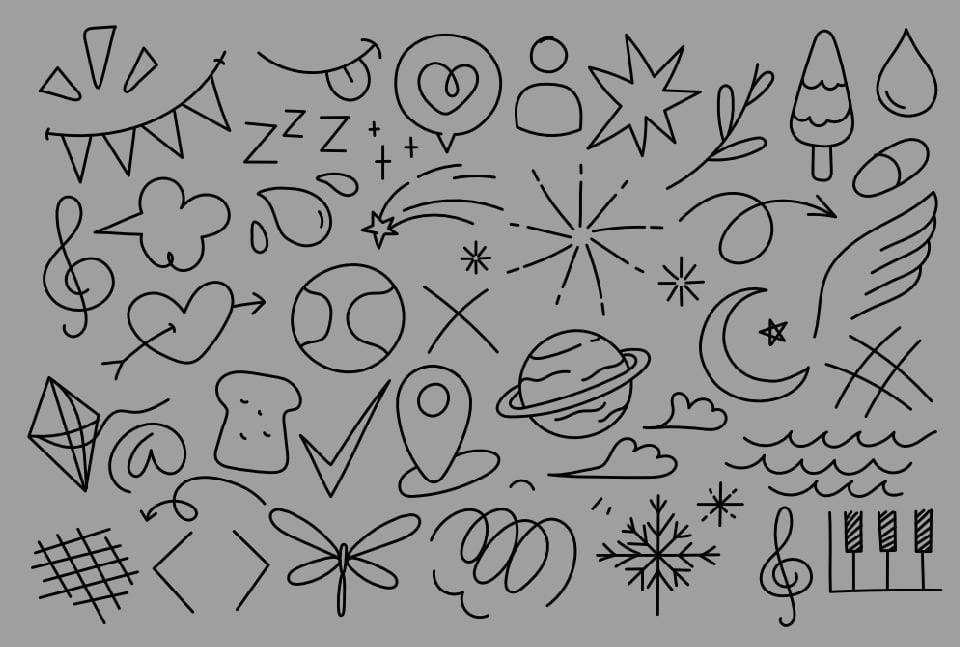

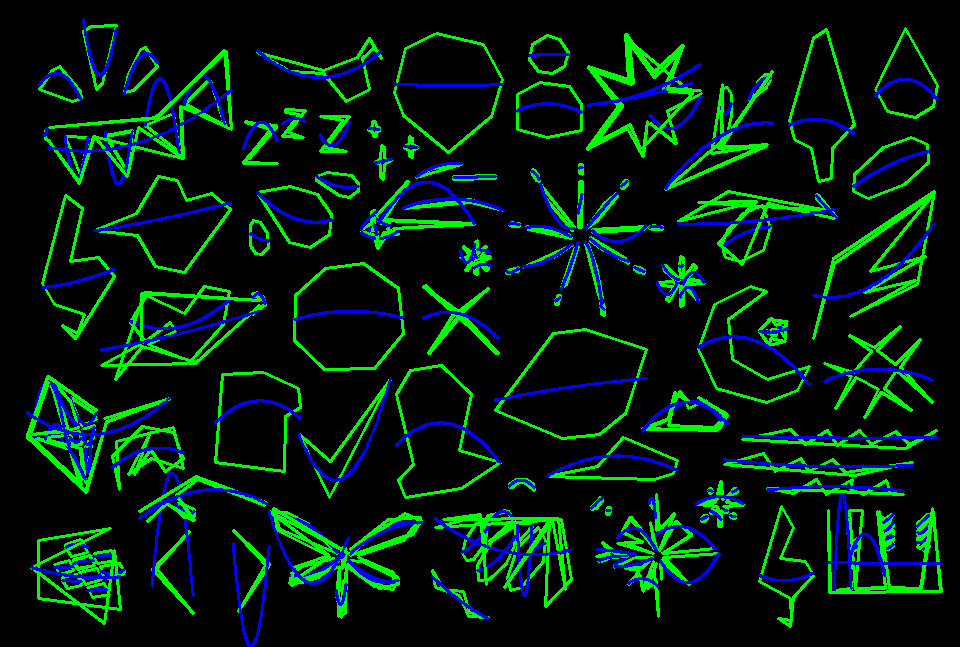

In [ ]:
import cv2
import numpy as np

def regularize_curves(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image for drawing the regularized curves
    regularized_image = np.zeros_like(image)

    # Process each contour to regularize the curves
    for contour in contours:
        # Approximate the contour to a polygon to reduce the number of points
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx_curve = cv2.approxPolyDP(contour, epsilon, True)

        # Draw the approximated curve
        cv2.drawContours(regularized_image, [approx_curve], -1, (0, 255, 0), 2)

        # Optionally, smooth the curve using a polynomial fit
        if len(approx_curve) >= 3:  # At least 3 points needed to fit a polynomial
            points = np.array([pt[0] for pt in approx_curve], dtype=np.float32)
            if points.shape[0] > 2:
                # Fit a polynomial of degree 2 (quadratic) to the points
                z = np.polyfit(points[:, 0], points[:, 1], 2)
                p = np.poly1d(z)
                x = np.linspace(points[:, 0].min(), points[:, 0].max(), num=100)
                y = p(x)
                smooth_curve = np.vstack((x, y)).T.astype(np.int32)
                for i in range(len(smooth_curve) - 1):
                    cv2.line(regularized_image, tuple(smooth_curve[i]), tuple(smooth_curve[i+1]), (255, 0, 0), 2)

    # Display the results
    cv2_imshow(image)
    cv2_imshow(regularized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    regularize_curves(image_path)


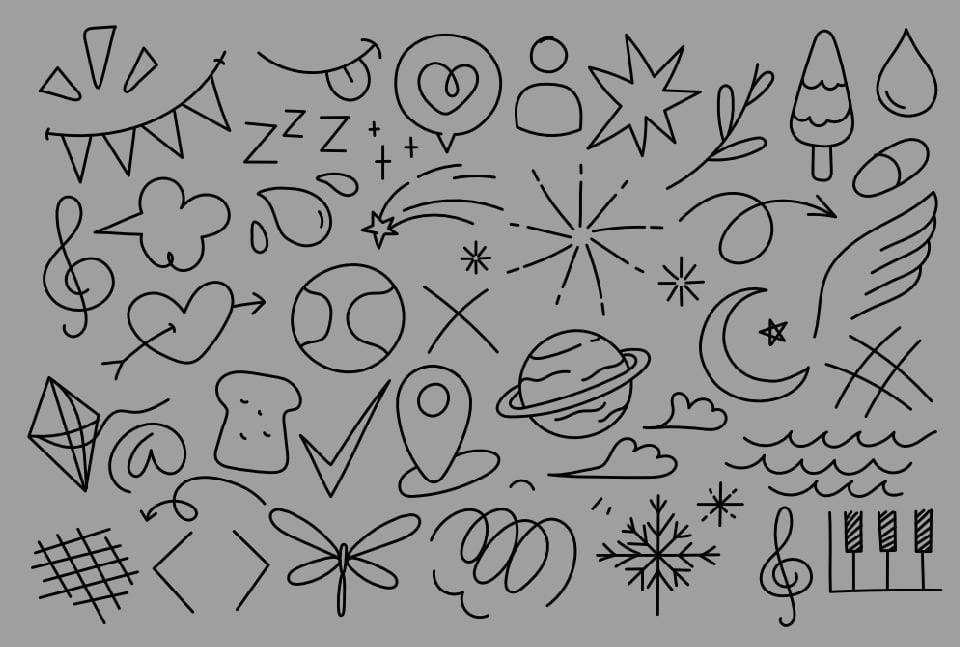

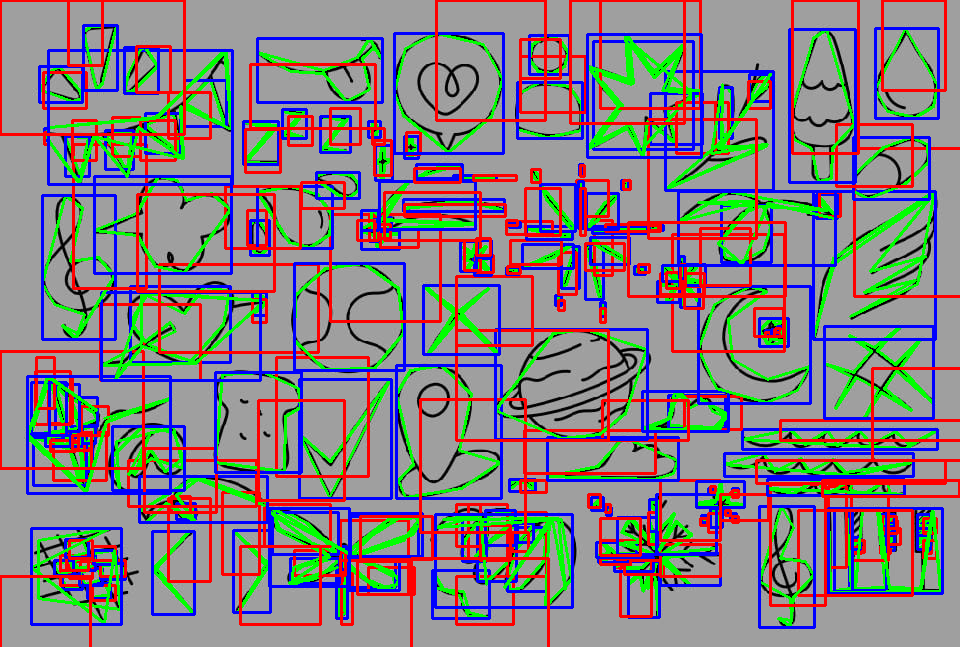

In [ ]:
import cv2
import numpy as np

def align_borders(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the image for drawing aligned shapes
    aligned_image = image.copy()

    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(approx)

        # Draw the original contour
        cv2.drawContours(aligned_image, [approx], -1, (0, 255, 0), 2)

        # Draw the bounding box
        cv2.rectangle(aligned_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Align borders to the nearest axis
        # Calculate the center of the bounding box
        center_x = x + w // 2
        center_y = y + h // 2

        # Calculate new aligned coordinates
        new_x = x
        new_y = y

        # Round the center coordinates to align the rectangle
        new_x = (center_x - (center_x % w))
        new_y = (center_y - (center_y % h))

        # Draw the aligned rectangle
        aligned_box = (new_x, new_y, w, h)
        cv2.rectangle(aligned_image, (new_x, new_y), (new_x + w, new_y + h), (0, 0, 255), 2)

    # Display the results
    cv2_imshow( image)
    cv2_imshow(aligned_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main function
if __name__ == "__main__":
    image_path = "/content/Art.jpeg"  # Replace with your image path
    align_borders(image_path)


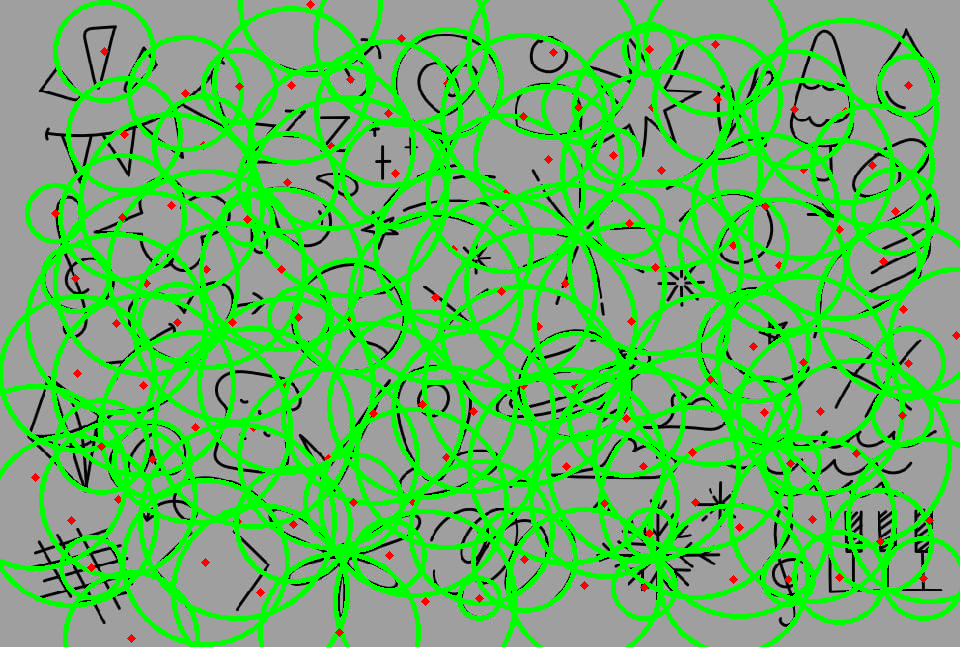

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def fit_circle(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Detect circles in the image using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=50, param2=30, minRadius=20, maxRadius=100)

    # If circles are detected, fit them to perfect circles
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        for (x, y, r) in circles:
            # Draw the perfect circle
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            # Optionally, draw the center of the circle
            cv2.circle(image, (x, y), 2, (0, 0, 255), 3)

    # Display the output image with fitted circles
    cv2_imshow( image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Usage example
fit_circle('/content/Art.jpeg')




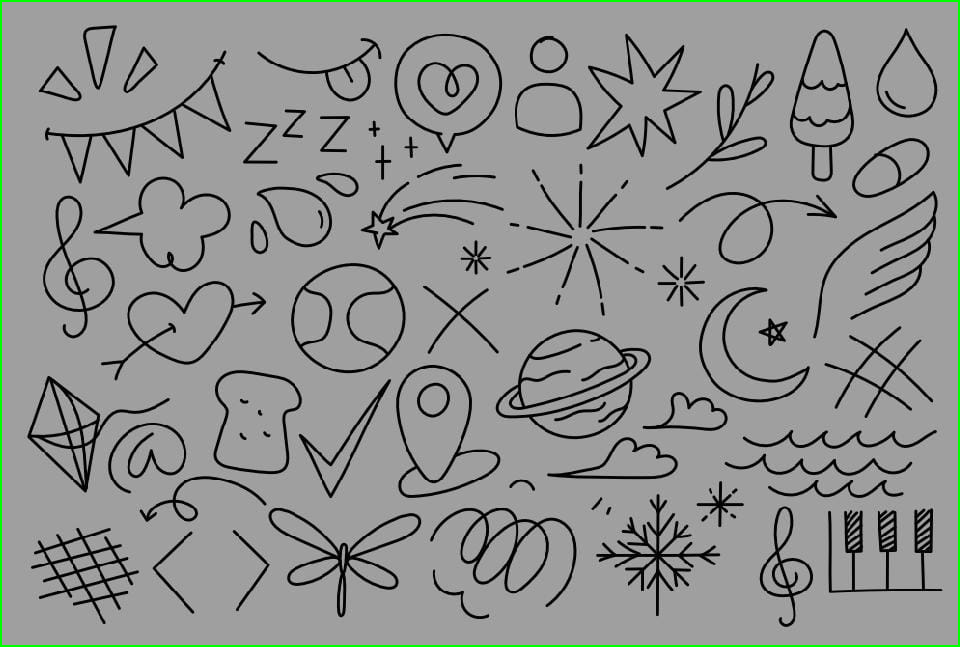

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/Art.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to get a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours and approximate them
for contour in contours:
    # Calculate the perimeter of the contour
    epsilon = 0.02 * cv2.arcLength(contour, True)
    # Approximate the contour
    approx = cv2.approxPolyDP(contour, epsilon, True)
    # Draw the approximated contour on the image
    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)

# Save or display the corrected image
cv2.imwrite('corrected_image.png', image)
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()




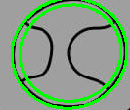

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Step 1: Load the image
image = cv2.imread('/content/circle.jpg')
original_image = image.copy()

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Step 4: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Fit curves and complete the incomplete ones
for contour in contours:
    if len(contour) > 5:
        # Fit an ellipse to the contour
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(original_image, ellipse, (0, 255, 0), 5)

# Step 6: Draw the complete curves on the image
cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the result
cv2.imwrite('completed_curves.jpg', original_image)
